In [1]:
import cv2
from skimage.transform import hough_line, hough_line_peaks
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [11]:
def solve(path_img):
    
    image = cv2.imread(path_img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_gaussian = cv2.GaussianBlur(gray, (5, 5), 0)
    image = cv2.Canny(img_gaussian, 100, 200)
    
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
    h, theta, d = hough_line(image,theta=tested_angles)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    ax = axes.ravel()
    ax[0].imshow(image)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()
    ax[1].imshow(image, cmap=cm.gray)
    ang=[]
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = dist / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        if(y0<0):continue
        k=np.cos(angle)*180/math.pi
        ang.append(k)
        ax[1].plot((0, image.shape[1]), (y0, y1), '-r')
    ax[1].set_xlim((0, image.shape[1]))
    ax[1].set_ylim((image.shape[0], 0))
    ax[1].set_axis_off()
    ax[1].set_title('Detected lines')
    
    plt.tight_layout()
    plt.show()
    
    ang.sort()
    sum=0
    cnt=0
    for i in range(0,len(ang)):
        for j in range(i+1,len(ang)):
            if(ang[j]-ang[i]>2):
                cnt+=1
                sum=sum+(ang[j]-ang[i])
    print("góc giữa 2 vật thể là:",round(sum/cnt,3),"độ")

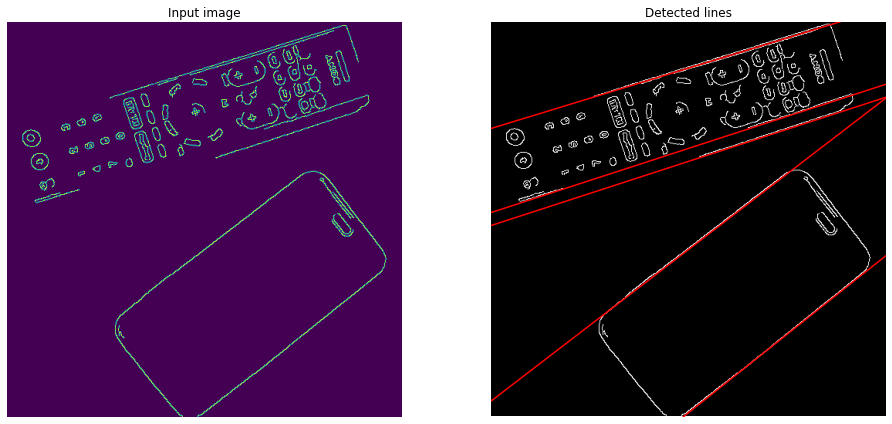

góc giữa 2 vật thể là: 17.886 độ


In [12]:
solve('img3_bruit2.png')

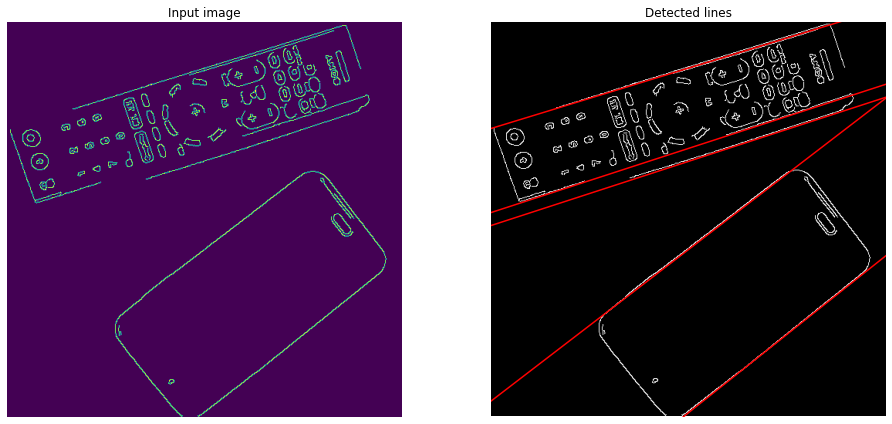

góc giữa 2 vật thể là: 17.886 độ


In [13]:
solve('img3_bruit.png')

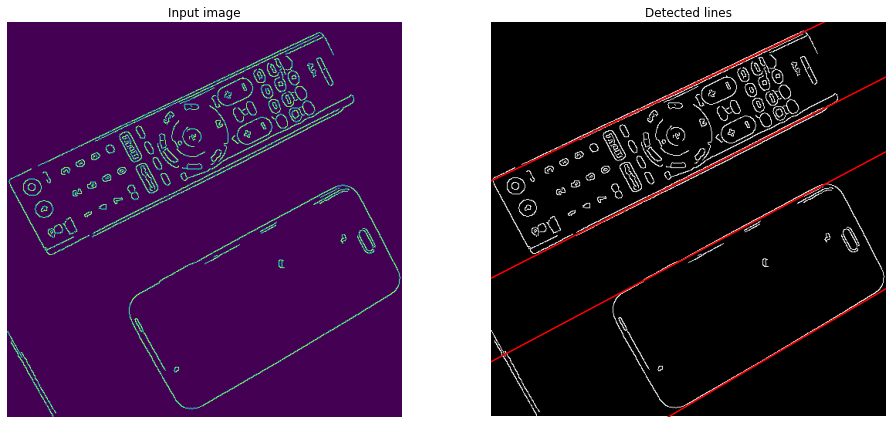

góc giữa 2 vật thể là: 2.974 độ


In [14]:
solve('img4.png')

C:\Users\Admin\AppData\Local\Temp/ipykernel_10300/944974975.py:12: RuntimeWarning: divide by zero encountered in log
  mag_spec2 = np.log(np.abs(fshift2))


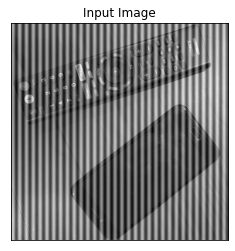

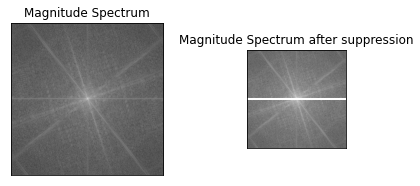

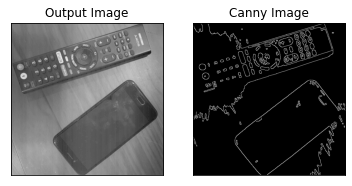

In [15]:
img = cv2.imread('img3_add.png',cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# calculate amplitude spectrum
mag_spec = np.log(np.abs(fshift))

h1 = int(f.shape[0]/2)        # number of rows/2                     
fshift2 = np.copy(fshift)
fshift2[h1] = 0

# calculate new amplitude spectrum
mag_spec2 = np.log(np.abs(fshift2))
inv_fshift = np.fft.ifftshift(fshift2)
# reconstruct image
img_recon = np.real(np.fft.ifft2(inv_fshift))
plt.subplot(111),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(mag_spec, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(mag_spec2, cmap = 'gray')
plt.title('Magnitude Spectrum after suppression'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.subplot(121),plt.imshow(img_recon, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
gray = cv2.cvtColor(np.uint8(img_recon), cv2.COLOR_BGR2RGB)
img_gaussian = cv2.GaussianBlur(gray, (7, 7), 0)
image = cv2.Canny(img_gaussian, 100, 200)
plt.subplot(122),plt.imshow(image, cmap = 'gray')
plt.title('Canny Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
def solve2(image):
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
    h, theta, d = hough_line(image,theta=tested_angles)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    ax = axes.ravel()
    ax[0].imshow(image)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()
    ax[1].imshow(image, cmap=cm.gray)
    
    ang=[]
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = dist/ np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        if(y0<0):continue
        k=np.cos(angle)*180/math.pi
        ang.append(k)
        ax[1].plot((0, image.shape[1]), (y0, y1), '-r')
    ax[1].set_xlim((0, image.shape[1]))
    ax[1].set_ylim((image.shape[0], 0))
    ax[1].set_axis_off()
    ax[1].set_title('Detected lines')
    
    plt.tight_layout()
    plt.show()
    ang.sort()
    sum=0
    cnt=0
    for i in range(0,len(ang)):
        for j in range(i+1,len(ang)):
            if(ang[j]-ang[i]>2):
                cnt+=1
                sum=sum+(ang[j]-ang[i])
    print("góc giữa 2 vật thể là:",round(sum/cnt,3),"độ")

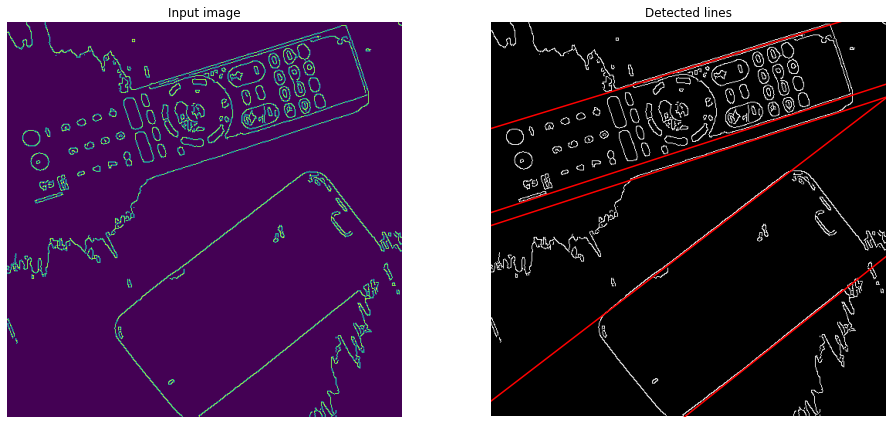

góc giữa 2 vật thể là: 17.886 độ


In [17]:
solve2(image)